### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Артамонов Т.Е.
##### Группа:   НКНбд-01-21

## Москва 2024
***

Контрольная работа 2 – Вариант 29 

1. Набор данных: wine_quality 

2. Независимая переменная: features/free sulfur dioxide 

3. Зависимая переменная: features/total sulfur dioxide 

4. Доп. признак: имеющий минимальную ковариацию с независимой переменной 

5. Визуализация доп. признака – эмпирическая плотность распределения 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

7. Степень полинома: 3 

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32, функция активации – relu. 

### Задание 1
Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). Оставьте в наборе признаки, принимающие числовые значения. 

### Решение
Импортируем библиотеки

In [1]:
import tensorflow_datasets as tfds
import numpy as np
import scipy
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
import pandas as pd
from matplotlib import cm

Загружаем датасет

In [2]:
df = tfds.as_dataframe(tfds.load("wine_quality", split="train"))
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


### Задание 2
Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось Х независимый признак, ось Y — зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду. 

### Решение
Построим диаграмму рассеяния чтобы оценить количество выбросов

<Axes: title={'center': 'Диаграмма рассеяния'}, xlabel='features/free sulfur dioxide', ylabel='features/total sulfur dioxide'>

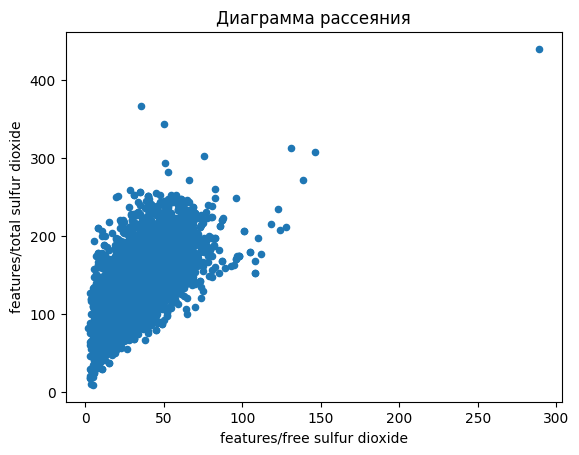

In [3]:
df.plot.scatter('features/free sulfur dioxide','features/total sulfur dioxide',title='Диаграмма рассеяния')

Выберем зависимый и независимый признаки, определим z_score так, чтобы процент выбросов был между 5% и 10%, запишем в 2 разные таблицы очищенные данные и выбросы

In [4]:
x_out = df[['features/free sulfur dioxide','features/total sulfur dioxide']]
df_z = x_out.apply(scipy.stats.zscore)
z_score = 2
df2_out = df[(((df_z >= -z_score).sum(axis=1)==2) & ((df_z <= z_score).sum(axis=1)==2))]
df2_del = pd.concat([df[((df_z < -z_score).sum(axis=1)==1)], df[((df_z > z_score).sum(axis=1)==1)]])
perc = df2_del.shape[0]/x_out.shape[0]*100
print(f'Процент выбросов = {perc}%')

Процент выбросов = 5.594120048999591%


In [5]:
df2_out

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.350000,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.200000,0.42,92.0,0.27,6
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.700000,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.800000,0.34,135.0,0.34,6
5,10.3,0.055,0.39,0.99652,7.0,42.0,3.37,7.500000,0.54,218.0,0.31,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,11.3,0.051,0.44,0.99058,6.4,39.0,3.11,1.200000,0.75,122.0,0.16,7
4894,10.8,0.050,0.27,0.99476,6.1,51.0,3.22,11.500000,0.37,133.0,0.24,6
4895,8.7,0.051,0.59,0.99886,8.1,60.0,2.96,13.600000,0.39,134.0,0.36,5
4896,10.6,0.031,0.28,1.00295,6.8,27.0,3.06,26.049999,0.42,122.0,0.45,6


Покажем на графике удаленные данные и очищенные данные

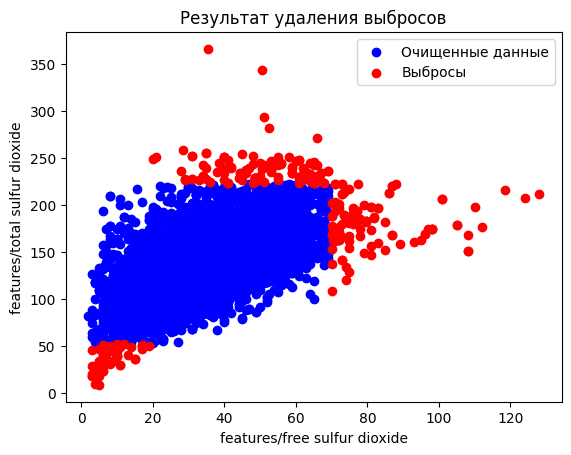

In [6]:
df = df2_out
plt.scatter(df['features/free sulfur dioxide'],df['features/total sulfur dioxide'], color='b', label='Очищенные данные')
plt.scatter(df2_del['features/free sulfur dioxide'],df2_del['features/total sulfur dioxide'], color='r', label='Выбросы')
plt.title('Результат удаления выбросов')
plt.xlabel('features/free sulfur dioxide')
plt.ylabel('features/total sulfur dioxide')
plt.legend()

### Задание 3
Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.

### Решение
Выполним стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. 

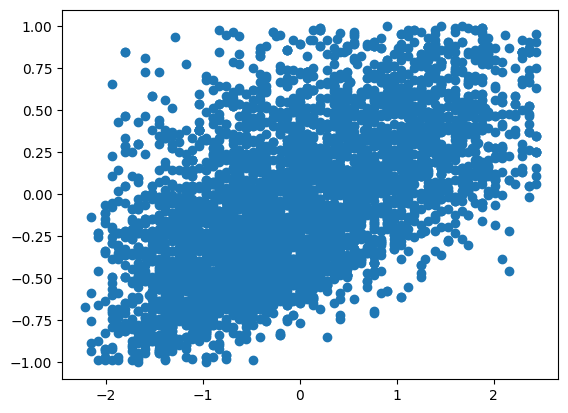

In [7]:
x = df['features/free sulfur dioxide']
x = (x - np.mean(x))/np.std(x)

y = df['features/total sulfur dioxide']
y = 2*(y - np.min(y))/(np.max(y) - np.min(y))-1
plt.scatter(x, y)

Для обучения разобьем данные на тренировычные и тестовые

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

Подготовим данные для полиномиальной модели

In [9]:
from sklearn.preprocessing import PolynomialFeatures

X_train = x_train.values.reshape(-1, 1)
poly = PolynomialFeatures(degree=3)
poly.fit(X_train)
X_train = poly.transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = x_test.values.reshape(-1, 1)
poly.fit(X_test)
X_test = poly.transform(X_test)
X_test = pd.DataFrame(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3224, 4), (1383, 4), (3224,), (1383,))

In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['loss'])])
  plt.title('Функция потерь при обучении модели')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)

Попробовав разные наборы параметров, остановились на функции потерь MSE и коэффициенте обучения 0.01(изменение оптимизатора не внесло существенных изменений).
Разобьём данные на некоторое количество частей, чтобы отслеживать результаты обучения в зависимости от количества точек

In [11]:
reg2_model = tf.keras.Sequential([
    tf.keras.Input(shape=4),
    tf.keras.layers.Dense(units=1)
])

reg2_model.compile(
    optimizer=tf.optimizers.Adamax(learning_rate=0.01),
    loss='MSE'
)
history = reg2_model.fit(X_train, y_train, epochs=100, verbose=1, validation_split = 0.3)

Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 2.8887 - val_loss: 1.2550
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.6771 - val_loss: 0.4789
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.3731 - val_loss: 0.3315
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2932 - val_loss: 0.2753
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2515 - val_loss: 0.2357
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2213 - val_loss: 0.2071
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.1985 - val_loss: 0.1860
Epoch 8/100
71/71 [==============================] - 0s 2ms/step - loss: 0.1814 - val_loss: 0.1705
Epoch 9/100
71/71 [==============================] - 0s 2ms/step - loss: 0.1685 - val_loss: 0.1579
Epoch 10/100
71/71 [==============================] - 0s 2ms/step - loss: 0.1585 - val_loss: 0.1488
Epoch 11/

Обучим теперь линейную

In [12]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=1),
    tf.keras.layers.Dense(units=1)
])

model.compile(
    optimizer=tf.optimizers.Adamax(learning_rate=0.01),
    loss='MSE'
)
history2 = model.fit(x_train, y_train, epochs=100, verbose=1, validation_split = 0.3)



Epoch 1/100
71/71 [==============================] - 1s 3ms/step - loss: 3.0691 - val_loss: 2.3546
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 1.7983 - val_loss: 1.3592
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 1.0349 - val_loss: 0.7749
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5971 - val_loss: 0.4539
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.3594 - val_loss: 0.2799
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2361 - val_loss: 0.1937
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.1758 - val_loss: 0.1516
Epoch 8/100
71/71 [==============================] - 0s 2ms/step - loss: 0.1478 - val_loss: 0.1334
Epoch 9/100
71/71 [==============================] - 0s 2ms/step - loss: 0.1359 - val_loss: 0.1252
Epoch 10/100
71/71 [==============================] - 0s 2ms/step - loss: 0.1311 - val_loss: 0.1222
Epoch 11/

In [13]:
y_predict_reg1 = reg2_model.predict(X_test)
y_predict_reg2 = model.predict(x_test)
print('Показатель R^2 модели полиномиальной регрессии:', r2_score(y_test, y_predict_reg1), '\nПоказатель R^2 модели линейной регрессии:', r2_score(y_test, y_predict_reg2))


44/44 [==============================] - 0s 744us/step
Показатель R^2 модели полиномиальной регрессии: 0.31701725541177317 
Показатель R^2 модели линейной регрессии: 0.31656720313553466


### Задание 4
Постройте кривые обучения для построенных нейронных сетей с зависимостью от количества эпох на одной визуализации. На визуализации создайте легенду.

### Решение

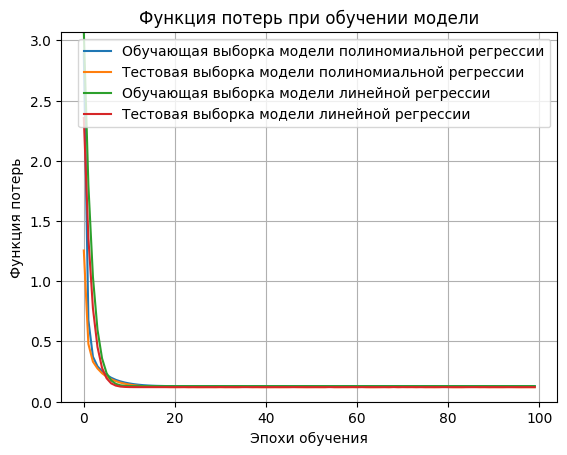

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylim([0, max(max(history.history['loss']), max(history2.history['loss']))])
plt.title('Функция потерь при обучении модели')
plt.xlabel('Эпохи обучения')
plt.ylabel('Функция потерь')
plt.legend(['Обучающая выборка модели полиномиальной регрессии', 'Тестовая выборка модели полиномиальной регрессии', 'Обучающая выборка модели линейной регрессии', 'Тестовая выборка модели линейной регрессии' ], loc='upper right')
plt.grid(True)


### Задание 5
Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось Х - независимый признак, ось У - зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.

### Решение

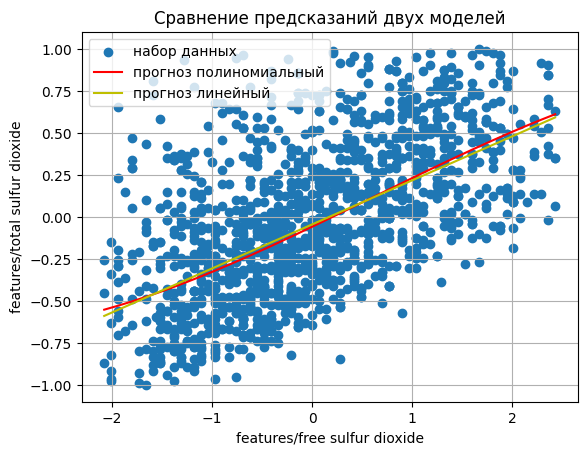

In [15]:
plt.scatter(x_test, y_test, label='набор данных')
plt.plot(np.sort(x_test), y_predict_reg1[np.argsort(x_test)], color='r', label='прогноз полиномиальный')
plt.plot(np.sort(x_test), y_predict_reg2[np.argsort(x_test)], color='y', label='прогноз линейный')
plt.title('Сравнение предсказаний двух моделей')
plt.xlabel('features/free sulfur dioxide')
plt.ylabel('features/total sulfur dioxide')
plt.legend(loc='upper left')
plt.grid();

### Задание 6
Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.

### Решение
Выберем все колонки кроме зависимого признака и признаков с дискретными значениями и посчитаем минимальную ковариацию признаков с независимым признаком

In [16]:
columns = ['features/free sulfur dioxide','features/alcohol','features/chlorides','features/citric acid','features/density','features/fixed acidity','features/pH','features/residual sugar','features/sulphates','features/volatile acidity']
df[columns]


,features/free sulfur dioxide,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/pH,features/residual sugar,features/sulphates,features/volatile acidity
0,44.0,9.0,0.054,0.34,1.00080,7.6,3.22,18.350000,0.55,0.32
1,35.0,12.2,0.063,0.49,0.99110,6.3,3.38,1.200000,0.42,0.27
3,20.0,9.0,0.110,0.27,0.99672,6.6,3.08,10.700000,0.41,0.41
4,57.0,12.0,0.035,0.30,0.99016,5.9,3.09,3.800000,0.34,0.34
5,42.0,10.3,0.055,0.39,0.99652,7.0,3.37,7.500000,0.54,0.31
...,...,...,...,...,...,...,...,...,...,...
4893,39.0,11.3,0.051,0.44,0.99058,6.4,3.11,1.200000,0.75,0.16
4894,51.0,10.8,0.050,0.27,0.99476,6.1,3.22,11.500000,0.37,0.24
4895,60.0,8.7,0.051,0.59,0.99886,8.1,2.96,13.600000,0.39,0.36
4896,27.0,10.6,0.031,0.28,1.00295,6.8,3.06,26.049999,0.42,0.45


In [17]:
npdf = np.array(df[columns].cov())
m = 10000
for i in range (1, len(npdf)-1):
    if abs(npdf[0][i]) < m:
            m = abs(npdf[0][i])
            L = i
print("Номер столбца с минимальной ковариацией с переменной features/free sulfur dioxide:", L) # 6 - features/pH
df[columns].cov()['features/free sulfur dioxide']

Номер столбца с минимальной ковариацией с переменной features/free sulfur dioxide: 6


features/free sulfur dioxide    207.654184
features/alcohol                 -4.228828
features/chlorides                0.026228
features/citric acid              0.167180
features/density                  0.012411
features/fixed acidity           -0.608211
features/pH                       0.001830
features/residual sugar          22.705027
features/sulphates                0.049783
features/volatile acidity        -0.162951
Name: features/free sulfur dioxide, dtype: float64

Это признак features/pH

### Задание 7
Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием.

### Решение

In [18]:
ph = df['features/pH']
ph = (ph - np.mean(ph))/np.std(ph)

In [19]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

<Axes: title={'center': 'График эмпирической функции распределения признака features/pH'}, xlabel='pH', ylabel='Значение эмпирической функции'>

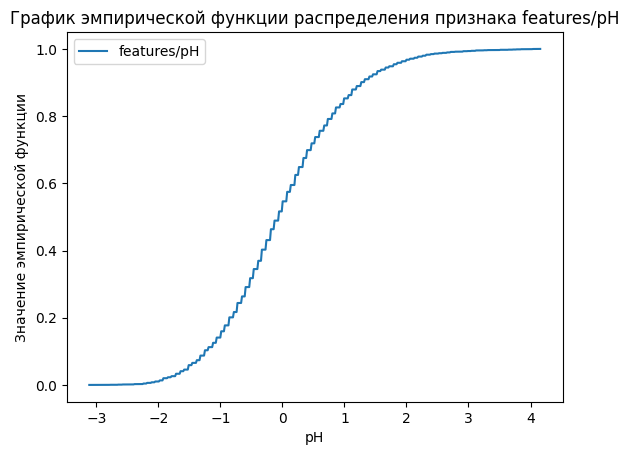

In [20]:
npoints = 500
dx = (ph.max()-ph.min())/npoints
xlist = [ph.min()+dx*i for i in range(npoints)]
ylist = [ECDF(ph, x) for x in xlist]
df_ECDF = pd.DataFrame(ylist, columns=['features/pH'],index=xlist)
df_ECDF.plot.line(title='График эмпирической функции распределения признака features/pH', xlabel = 'pH', ylabel = 'Значение эмпирической функции')

### Задание 8
Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.

### Решение
Выделим стандартизированные признаки

In [21]:
df0 = df[['features/free sulfur dioxide', 'features/pH']]
df0['features/pH'] = ph
df0['features/free sulfur dioxide'] = x
df0

C:\Users\artam\AppData\Local\Temp\ipykernel_24100\437673250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['features/pH'] = ph
C:\Users\artam\AppData\Local\Temp\ipykernel_24100\437673250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['features/free sulfur dioxide'] = x


,features/free sulfur dioxide,features/pH
0,0.697108,0.198030
1,0.072483,1.257405
3,-0.968558,-0.728924
4,1.599344,-0.662713
5,0.558303,1.191193
...,...,...
4893,0.350094,-0.530292
4894,1.182928,0.198030
4895,1.807553,-1.523455
4896,-0.482739,-0.861346


Построим модель с указанными условиями, выберем MSE функцию потерь и оптимизатор с градиентным спуском

In [22]:
model_large = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model_large.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    loss='MSE'
)

history3 = model_large.fit(df0, y, epochs=100, validation_split = 0.3)


Epoch 1/100
101/101 [==============================] - 1s 3ms/step - loss: 0.1885 - val_loss: 0.1776
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1808 - val_loss: 0.1713
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1747 - val_loss: 0.1661
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1696 - val_loss: 0.1619
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1653 - val_loss: 0.1583
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1615 - val_loss: 0.1551
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1582 - val_loss: 0.1523
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1551 - val_loss: 0.1497
Epoch 9/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1474
Epoch 10/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1499 - val_lo

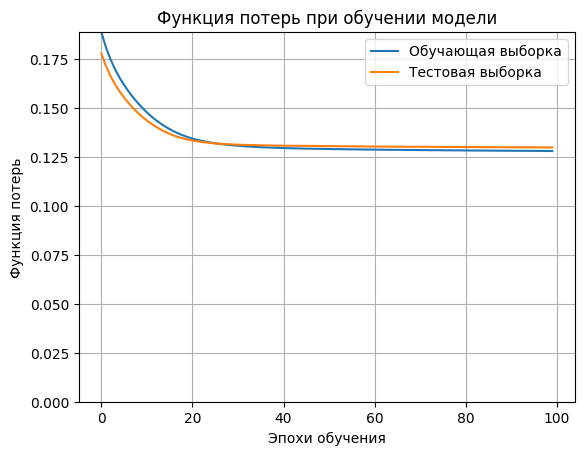

In [23]:
plot_loss(history3)

### Задание 9
Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок.

### Решение
Подготовим данные

In [24]:
n_plot = 51
z = y
y = ph
x_plot = np.linspace(np.min(x), np.max(x), n_plot)
y_plot = np.linspace(np.min(y), np.max(y), n_plot)
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
z_mesh = model_large.predict(xy_2).reshape((n_plot, n_plot))
z_mesh.shape

82/82 [==============================] - 0s 951us/step


(51, 51)

Нарисуем график

Text(0.5, 0.92, 'Свойства вин')

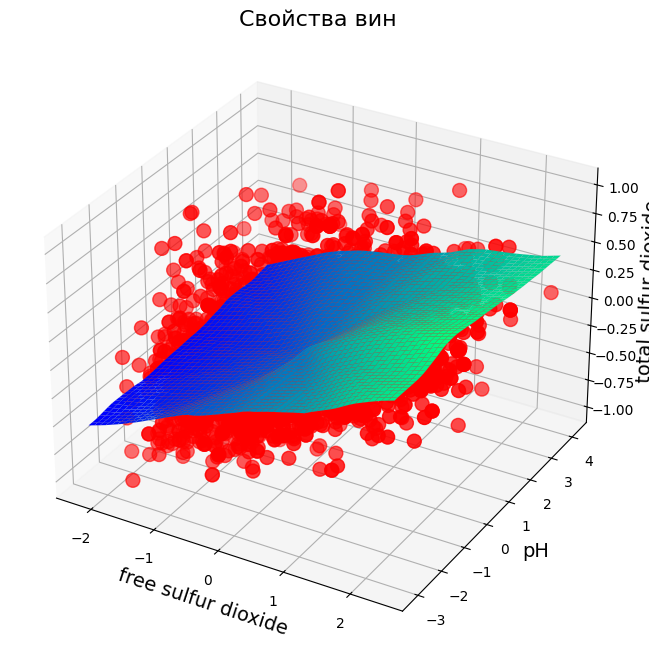

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, \
       rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, \
       edgecolors='gray')
ax.scatter(x, y, z, s=100, c='r' )

ax.set_xlabel('free sulfur dioxide', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_zlabel('total sulfur dioxide', fontsize=14)
ax.set_title('Свойства вин', fontsize=16)


### Задание 10
Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

### Решение
Разобьем данные на тестовую и тренирочную выборки

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df0, z, test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3224, 2), (1383, 2), (3224,), (1383,))

Построим заново модель

In [27]:
train_score3 = []
test_score3 = []
history4 = []

for i in range(104, len(X_train)+1, 104):
    model_large_part = tf.keras.Sequential([
    tf.keras.Input(shape=(None,2)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])


    model_large_part.compile(
    optimizer=tf.optimizers.Adamax(learning_rate=0.001),
    loss='MSE'
)
    
    model_large_part.fit(x_train[:i], y_train[:i], epochs=50, verbose=0, validation_split = 0.3)

    y_train_predict = model_large_part.predict(x_train[:i])
    train_score3.append(r2_score(y_train[:i], y_train_predict))

    y_test_predict = model_large_part.predict(x_test)
    test_score3.append(r2_score(y_test, y_test_predict))
    print('-->', i, ' done')


44/44 [==============================] - 0s 849us/step
--> 104  done
44/44 [==============================] - 0s 884us/step
--> 208  done
44/44 [==============================] - 0s 860us/step
--> 312  done
44/44 [==============================] - 0s 1ms/step
--> 416  done
44/44 [==============================] - 0s 884us/step
--> 520  done
44/44 [==============================] - 0s 907us/step
--> 624  done
44/44 [==============================] - 0s 930us/step
--> 728  done
44/44 [==============================] - 0s 1000us/step
--> 832  done
44/44 [==============================] - 0s 977us/step
--> 936  done
44/44 [==============================] - 0s 907us/step
--> 1040  done
44/44 [==============================] - 0s 977us/step
--> 1144  done
44/44 [==============================] - 0s 884us/step
--> 1248  done
44/44 [==============================] - 0s 1ms/step
--> 1352  done
44/44 [==============================] - 0s 907us/step
--> 1456  done
44/44 [=========================

Построим кривую обучения в зависимости от количества точек в обучающей выборке

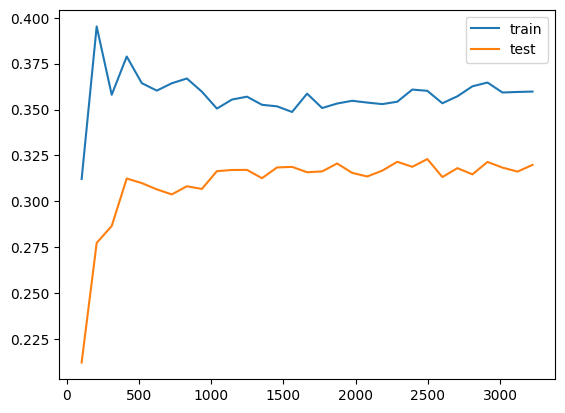

In [28]:
plt.plot([i for i in range(104, len(x_train)+1, 104)],
                               train_score3, label="train")
plt.plot([i for i in range(104, len(x_train)+1, 104)],
                               test_score3, label="test")

plt.legend();
